<a href="https://www.kaggle.com/code/muradpitafi/binary-classification-with-bank-churn?scriptVersionId=161214930" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


In [2]:
banks = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')

In [3]:
import seaborn as sns


cat =  []
num = []
for i in banks.columns:
    if banks[i].nunique() < 12:
        cat.append(i)
    else:
        num.append(i)

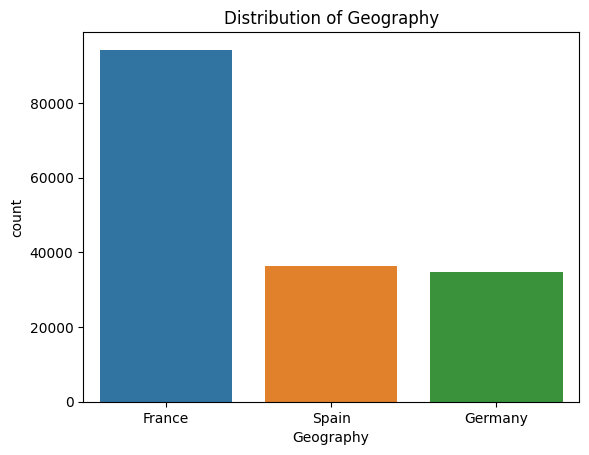

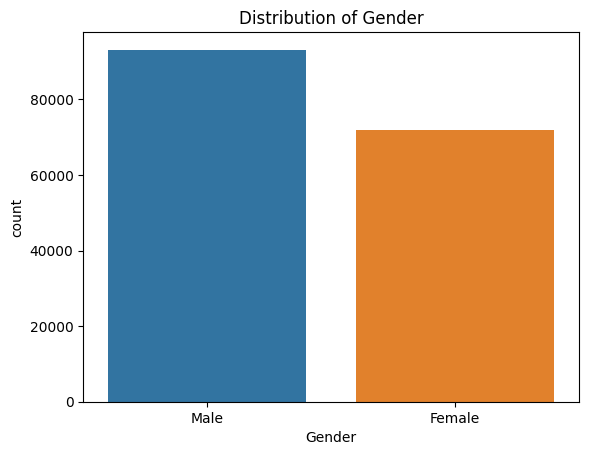

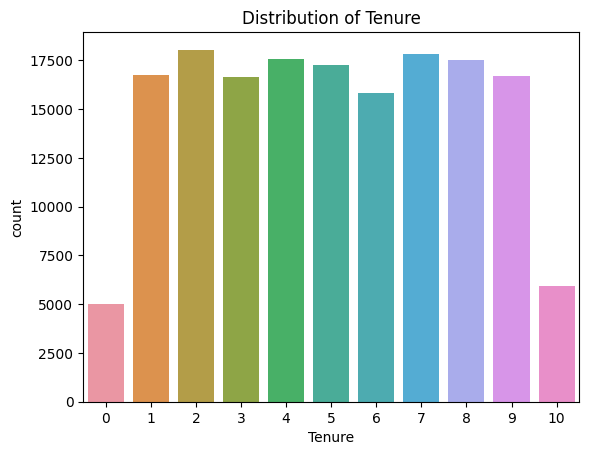

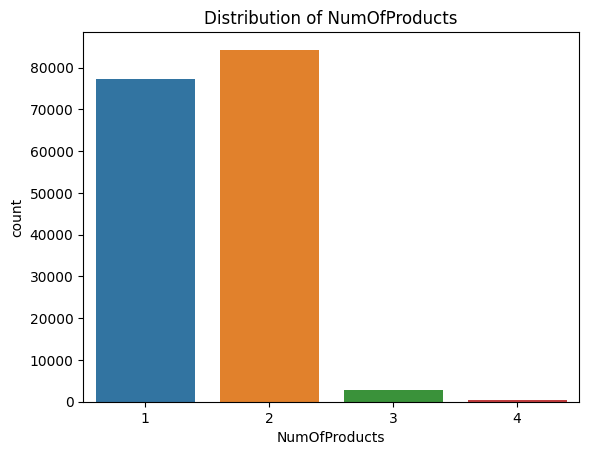

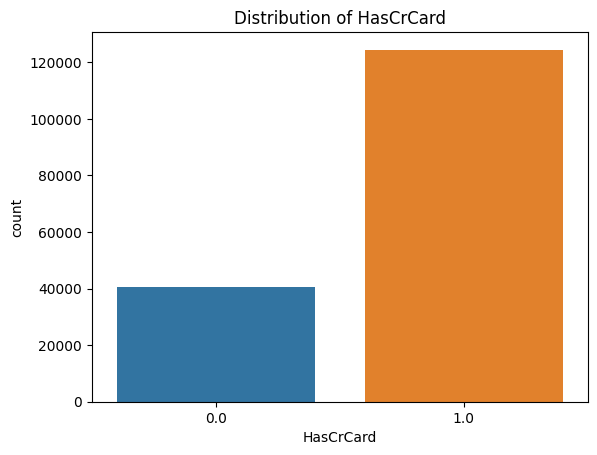

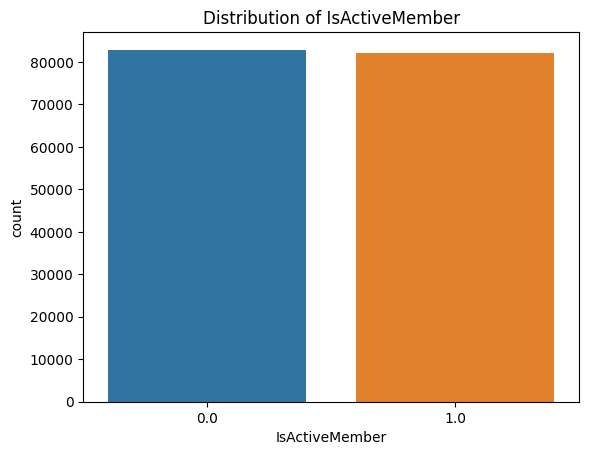

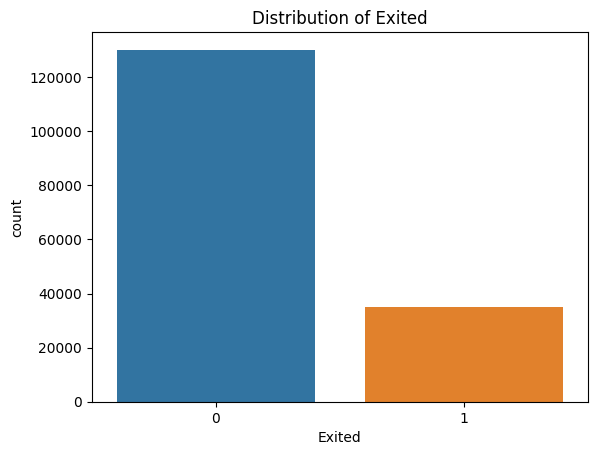

In [4]:
import matplotlib.pyplot as plt
for i in cat:
    plt.title(f'Distribution of {i}')
    sns.countplot(x = i, data = banks)
    plt.show()
    

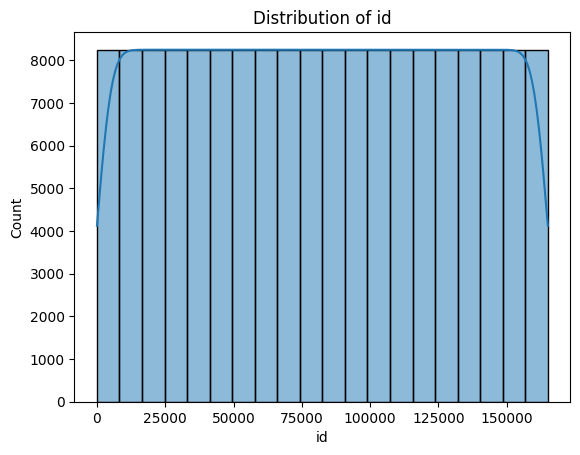

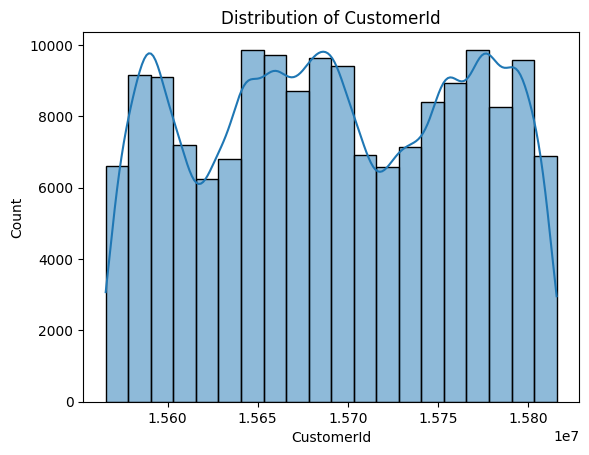

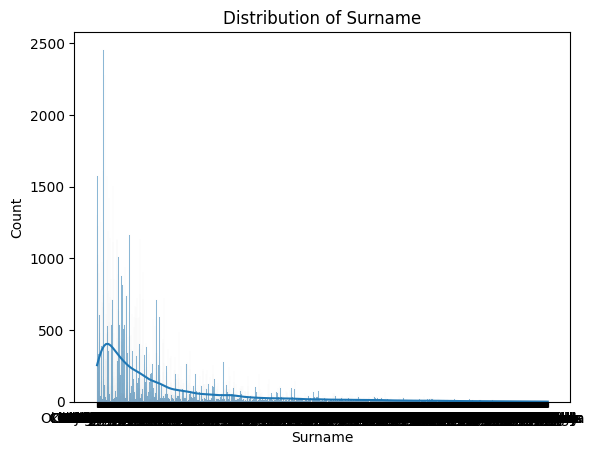

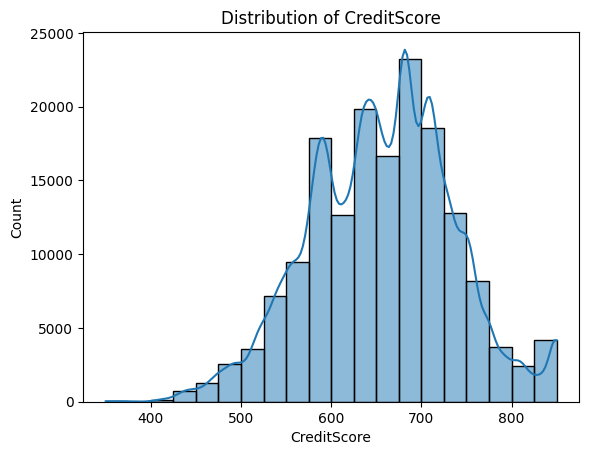

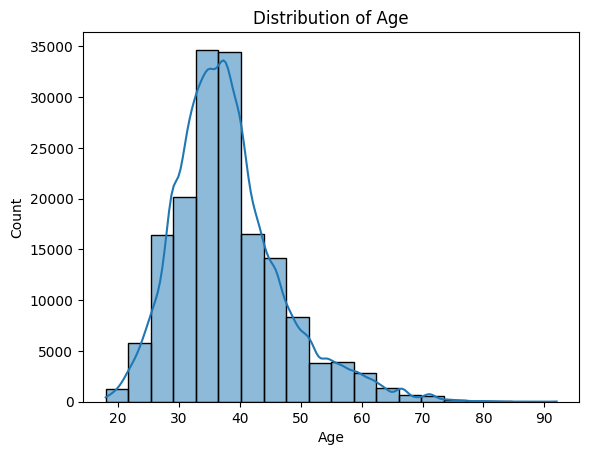

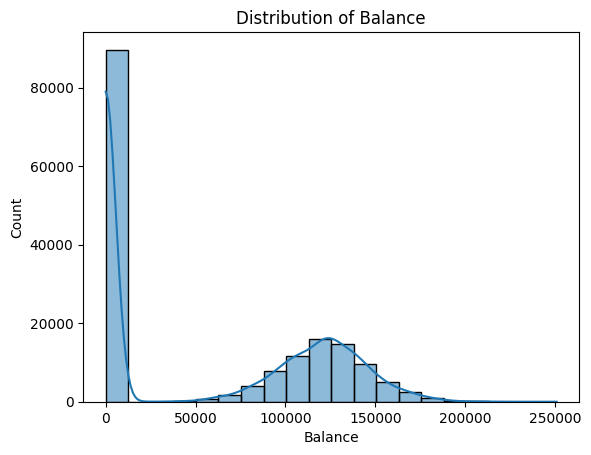

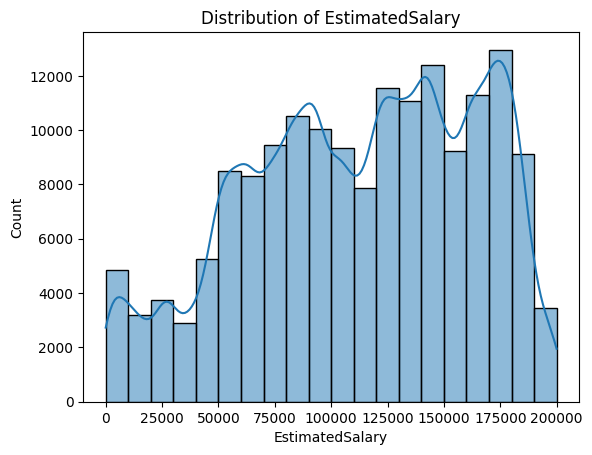

In [5]:
for i in num:
    plt.title(f'Distribution of {i}')
    sns.histplot(x = i, data = banks, bins = 20 , kde = True)
    plt.show()

In [6]:
data = banks.drop(['CreditScore', 'CustomerId', 'Surname'], axis = 1)
data1 = test.drop(['CreditScore', 'CustomerId', 'Surname'], axis = 1)

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data[['Geography']])
data1['Geography'] = label_encoder.fit_transform(data1[['Geography']])
data.head()

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,id,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,0,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,0,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,0,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,2,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [8]:
data['Gender'] = label_encoder.fit_transform(data[['Gender']])
data1['Gender'] = label_encoder.fit_transform(data1[['Gender']])
data.head()

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,id,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i in data.columns:
    data[i] = scaler.fit_transform(data[[i]])
    

In [10]:
x = data.drop(['Exited', 'id'], axis = 1)
y = data['Exited']

In [11]:
y = y.astype(int)

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 40)

In [13]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score , f1_score , classification_report
import xgboost as xgb
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [14]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
rfc.score(xtest, ytest)

0.849811153077094

In [15]:
# models = {
#     'Logistic Regression': LogisticRegression(),
#     'Random Forest': RandomForestClassifier(),
#     'Support Vector Machine': SVC(),
#     'Xgboost': xgb.XGBClassifier(),
#     'Light Gradient Boosting': LGBMClassifier(verbose = 0)
# }

# kf = KFold(n_splits=5, shuffle=True, random_state=43)

# mean_scores = []

# for model_name, model in models.items():
#     fold_scores = cross_val_score(model, x, y, cv=kf)
#     mean_scores.append(np.mean(fold_scores))

# plt.figure(figsize=(10, 6))
# plt.bar(models.keys(), mean_scores, color=['blue', 'green', 'orange', 'red', 'purple'])
# plt.title('Cross-validation Scores Comparison')
# plt.xlabel('Models')
# plt.ylabel('Average Cross-validation Score')
# plt.show()

In [16]:
# import plotly.express as px

# fig = px.bar(model_results.melt(id_vars='Model'), x='Model', y='value', color='variable', barmode='group', 
#              text='value', title='Model Performance Metrics Comparison',
#              labels={'value': 'Score', 'variable': 'Metric'},
#              height=600, width=1090)
# fig.update_traces(textposition='outside')

# fig.show()

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, Y_res = smote.fit_resample(x, y)

xtrain,xtest, ytrain, ytest = train_test_split(X_res, Y_res, train_size=0.70, random_state=43)

In [18]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
rfc.score(xtest, ytest)

0.8905825690423733

In [19]:
lgbm = LGBMClassifier()
lgbm.fit(xtrain, ytrain)
lgbm.score(xtest,ytest)

0.8965389147922325

In [20]:
data1.head()

,id,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,0,0,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,0,0,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,0,0,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,0,1,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00


In [21]:
x = data1.drop(['id'], axis = 1)

In [22]:
predict = lgbm.predict(x)

In [23]:
Prediction = pd.DataFrame({"Id" : data1["id"], "Price":predict})


In [24]:
Prediction.to_csv('submission.csv', index = False)